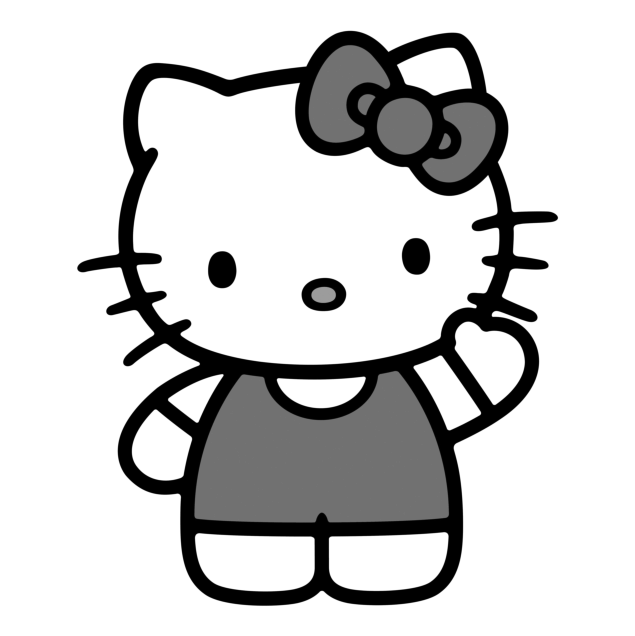

Original Size: 30.72 MB


In [9]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
plt.rcParams['figure.figsize'] = [16, 8]


A = imread('hello-kitty2.jpeg')
X = np.mean(A, -1); # Convert RGB to grayscale

im = Image.open('hello-kitty2.jpeg')
width, height = im.size
originalSize = (width * height * 3) / 1000000
originalSize = round(originalSize, 2)



img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()



print(f"Original Size: {originalSize} MB")

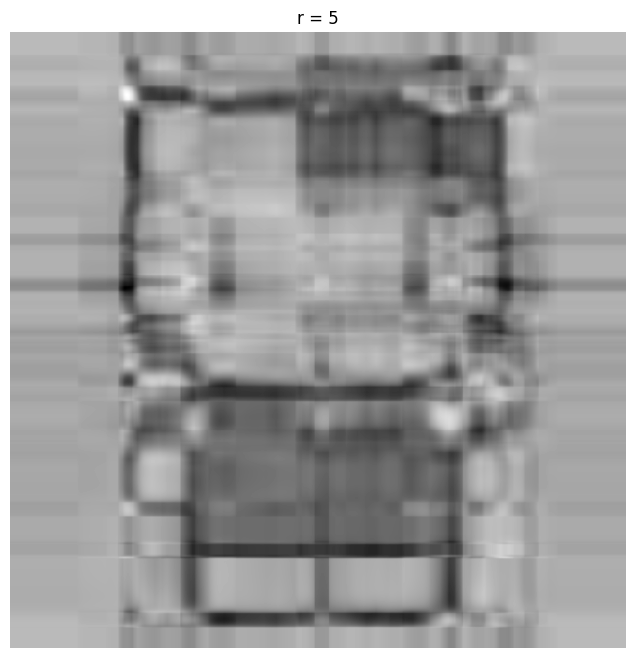

Compressed Size: 0.1 MB


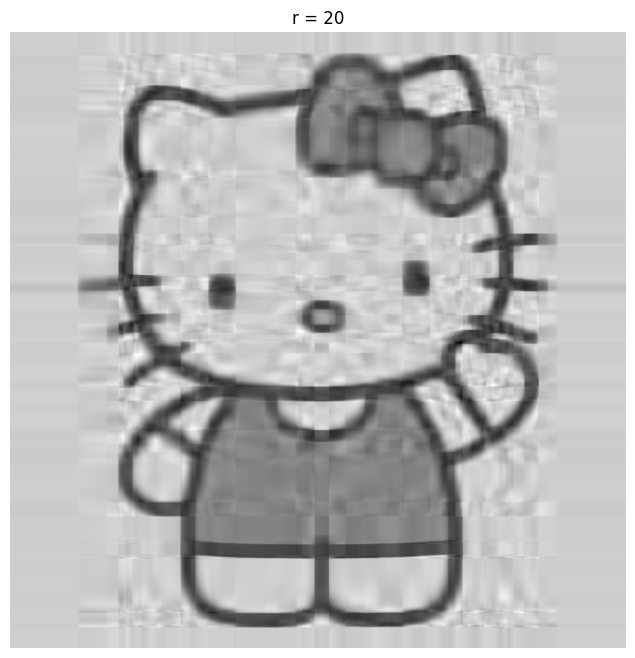

Compressed Size: 0.38 MB


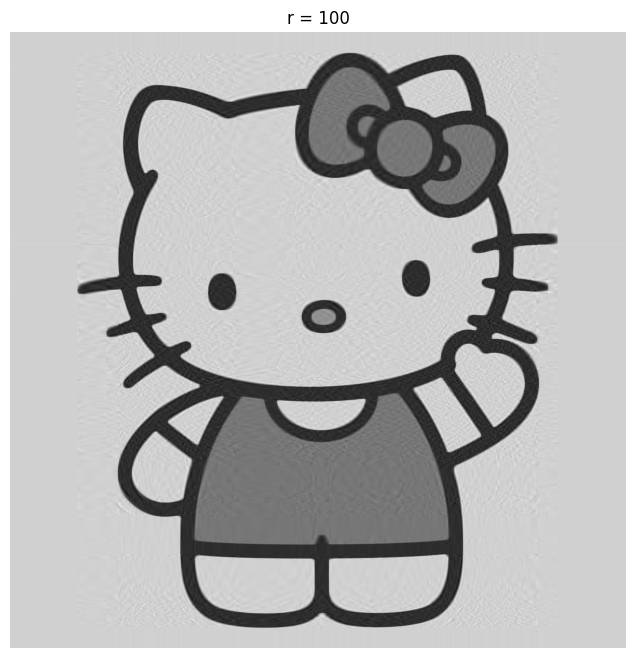

Compressed Size: 1.92 MB


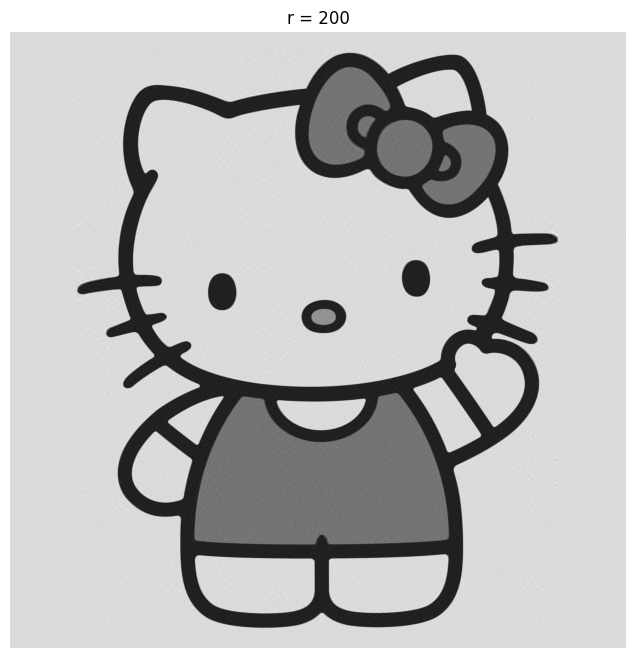

Compressed Size: 3.84 MB


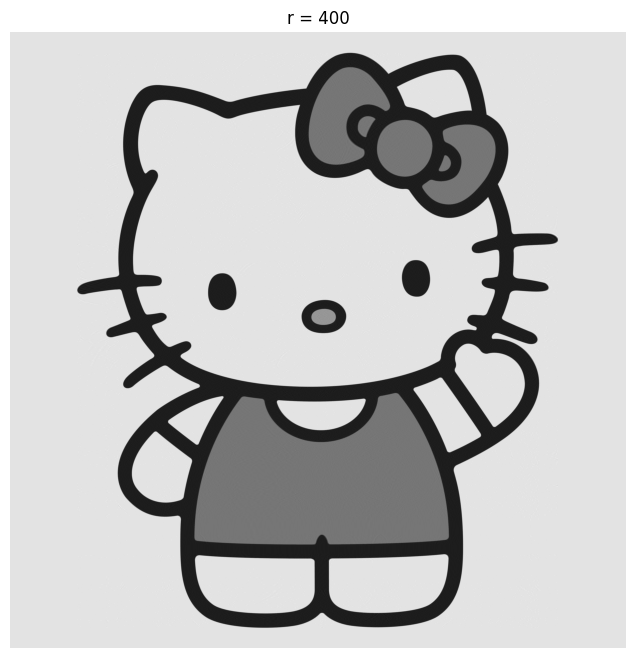

Compressed Size: 7.68 MB


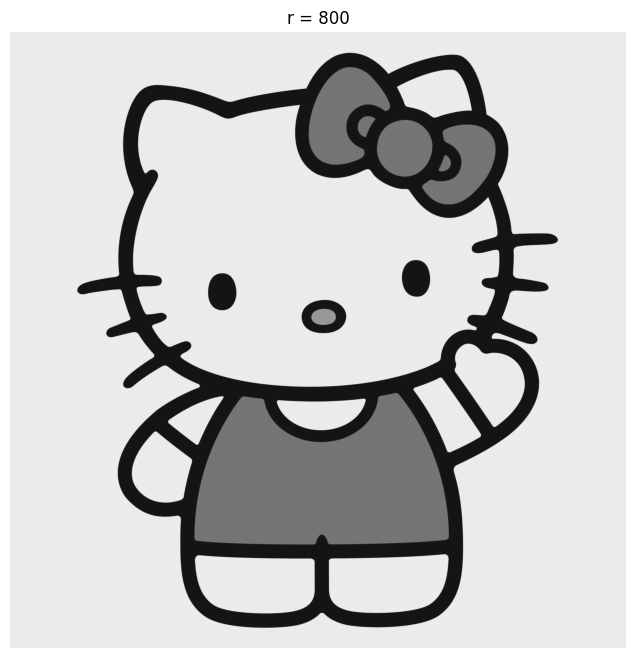

Compressed Size: 15.36 MB


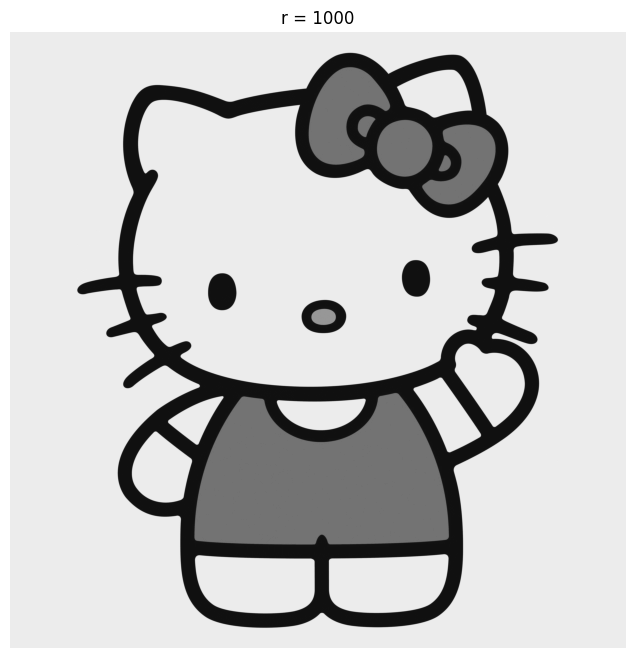

Compressed Size: 19.2 MB


In [12]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100, 200, 400, 800, 1000):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    compressedSize = (r * (1 + width + height) * 3) / 1000000
    compressedSize = round(compressedSize, 2)
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()
    print(f"Compressed Size at r = {r}: {compressedSize} MB")


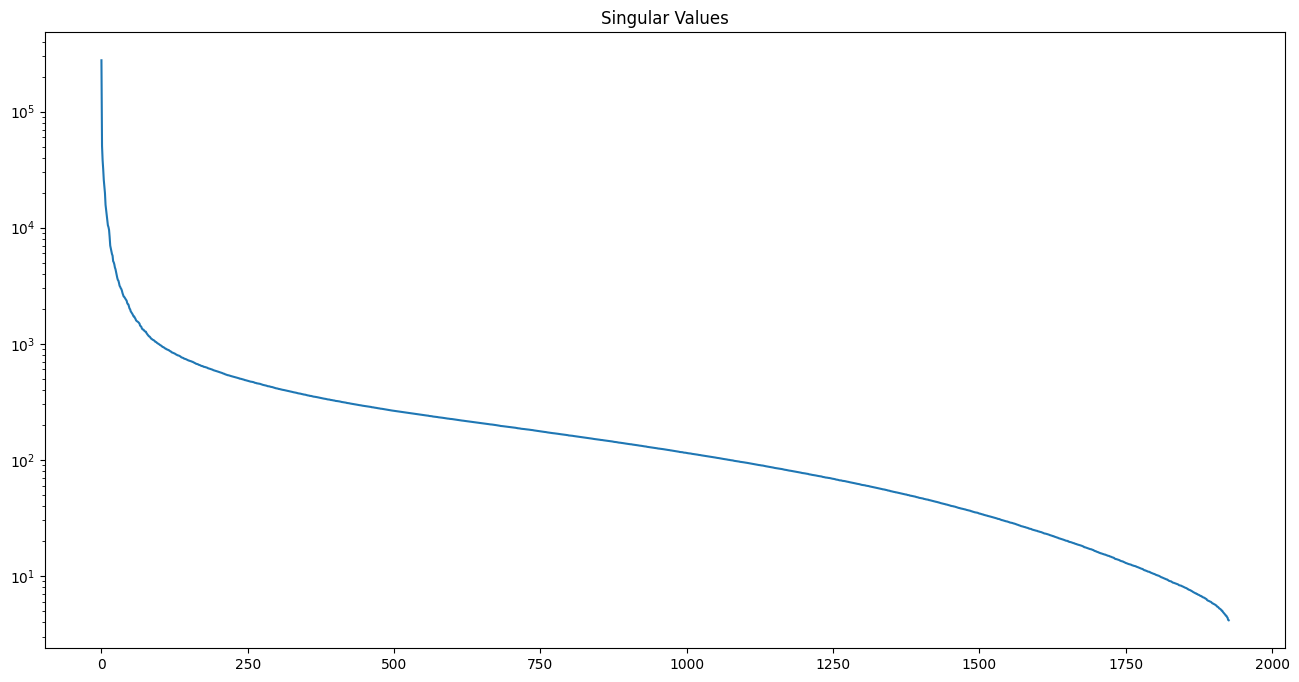

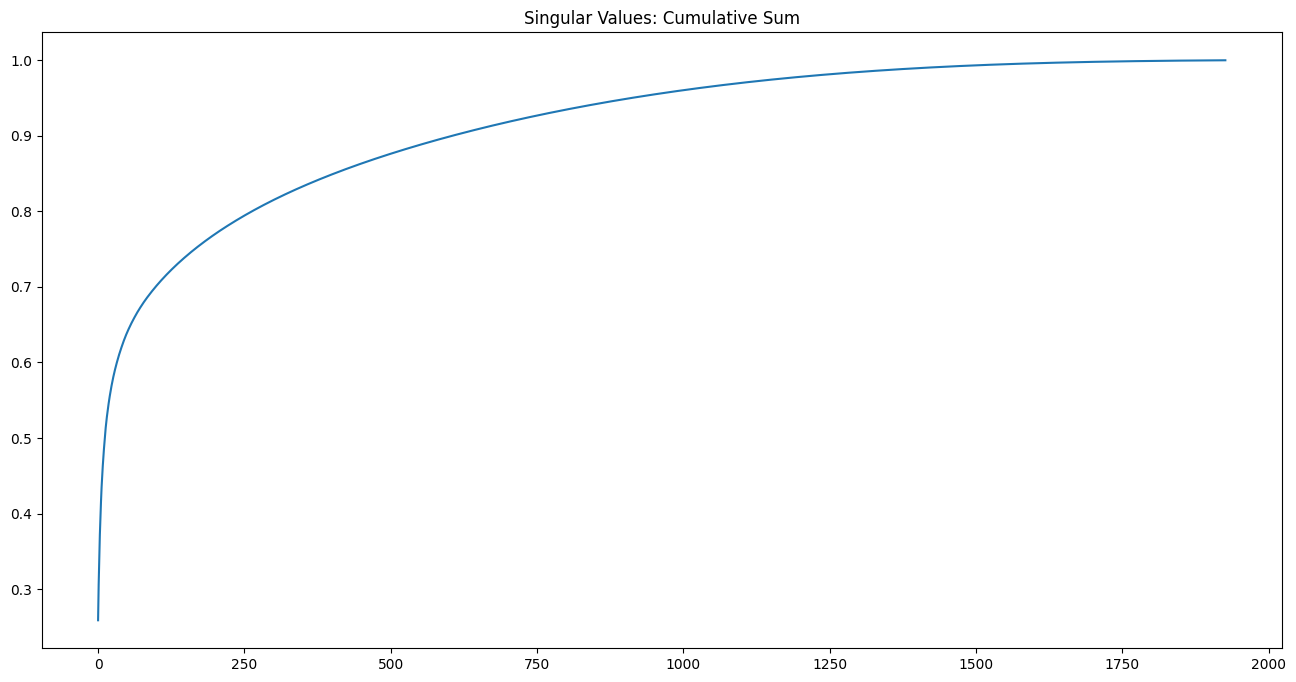

In [24]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()